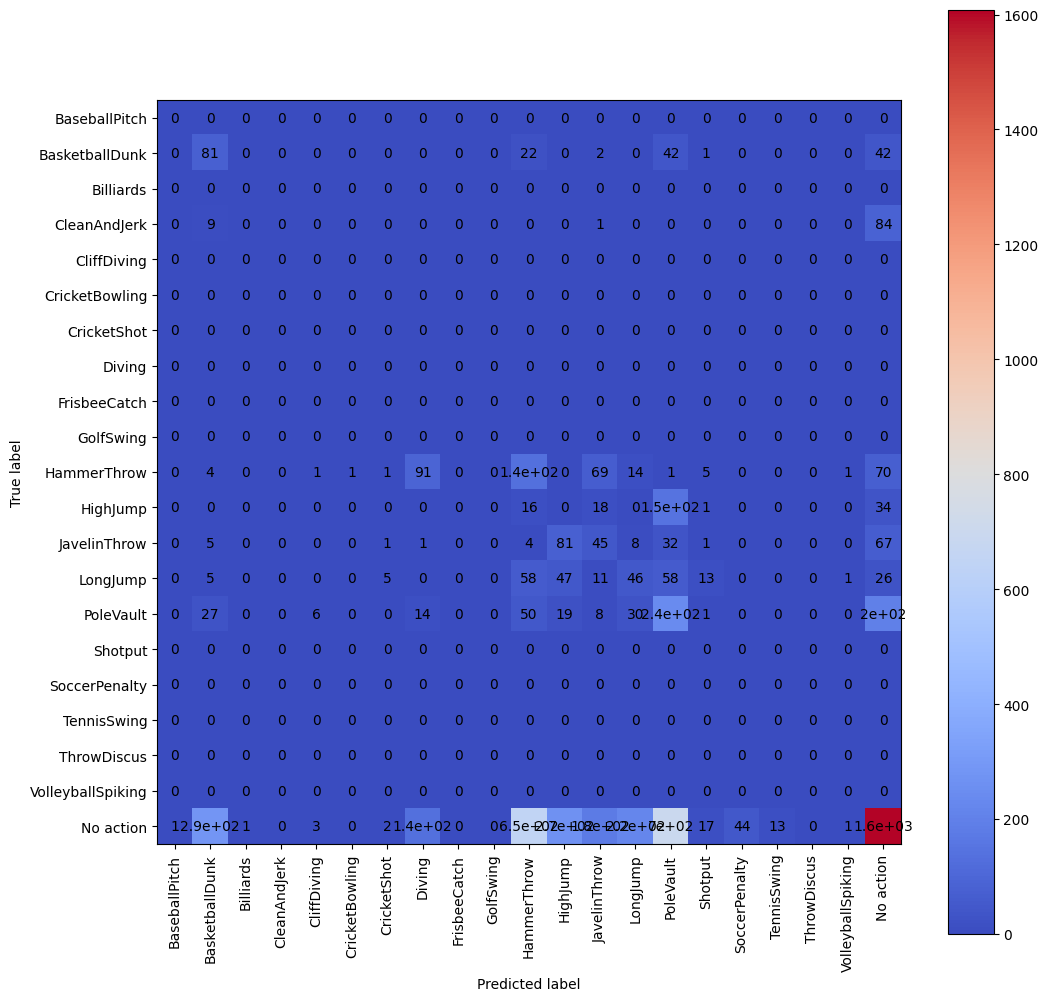

In [1]:
from locale import normalize

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from datasets.thumos import ThumosDataset


# cm_path = "exps/thumos/return_maps/confusion_matrix/npy/1400000.npy"
cm_path = "exps/thumos/resnet/confusion_matrix/npy/5000.npy"

cm = np.load(cm_path)
labels = display_labels=ThumosDataset.categories + ["No action"]

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
disp.plot(ax=ax, xticks_rotation='vertical', cmap='coolwarm', text_kw={'color': 'black'})

plt.show()

/tmp/ipykernel_18970/192845412.py:1: RuntimeWarning: invalid value encountered in divide
  disp = ConfusionMatrixDisplay(confusion_matrix=cm / cm.sum(axis=0), display_labels=labels)


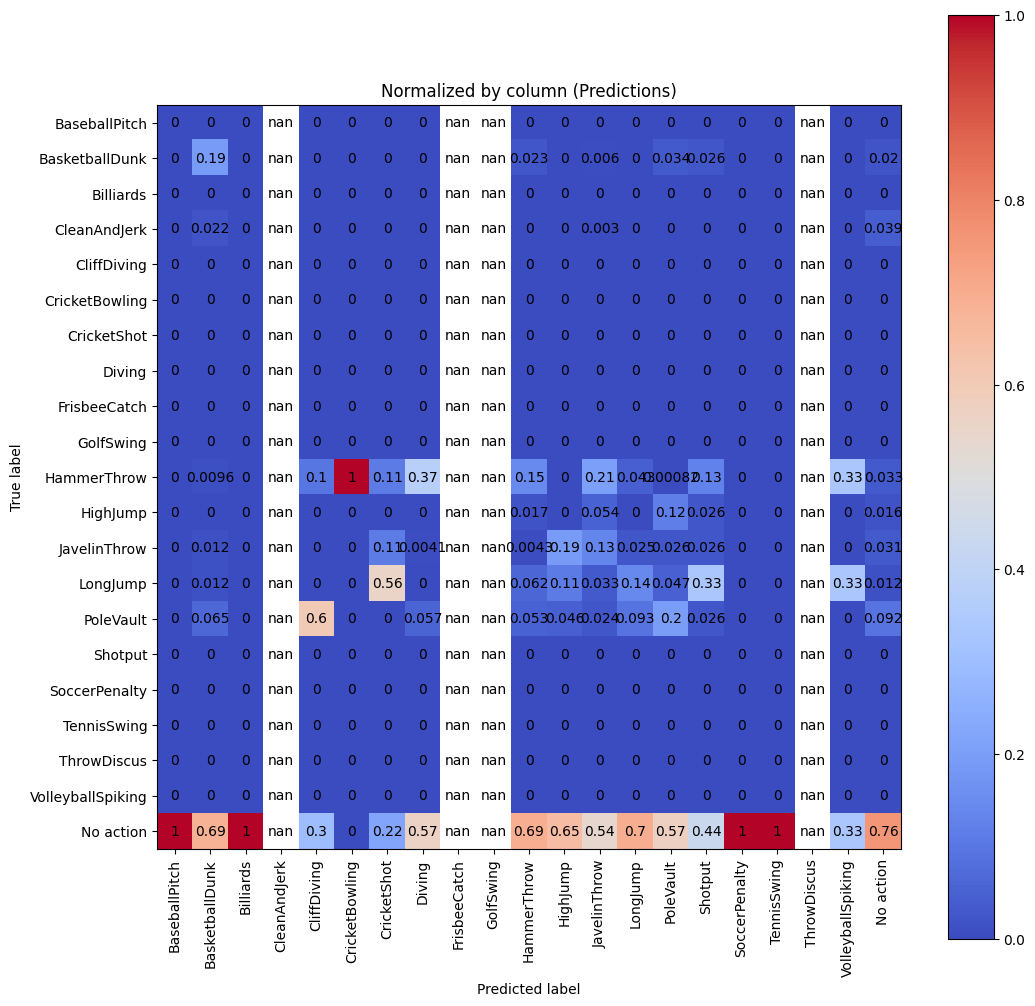

In [2]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm / cm.sum(axis=0), display_labels=labels)
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
disp.plot(ax=ax, xticks_rotation='vertical', cmap='coolwarm', text_kw={'color': 'black'})
plt.title("Normalized by column (Predictions)")
plt.show()

/tmp/ipykernel_18970/857413088.py:1: RuntimeWarning: invalid value encountered in divide
  disp = ConfusionMatrixDisplay(confusion_matrix=cm / cm.sum(axis=1, keepdims=True), display_labels=labels)


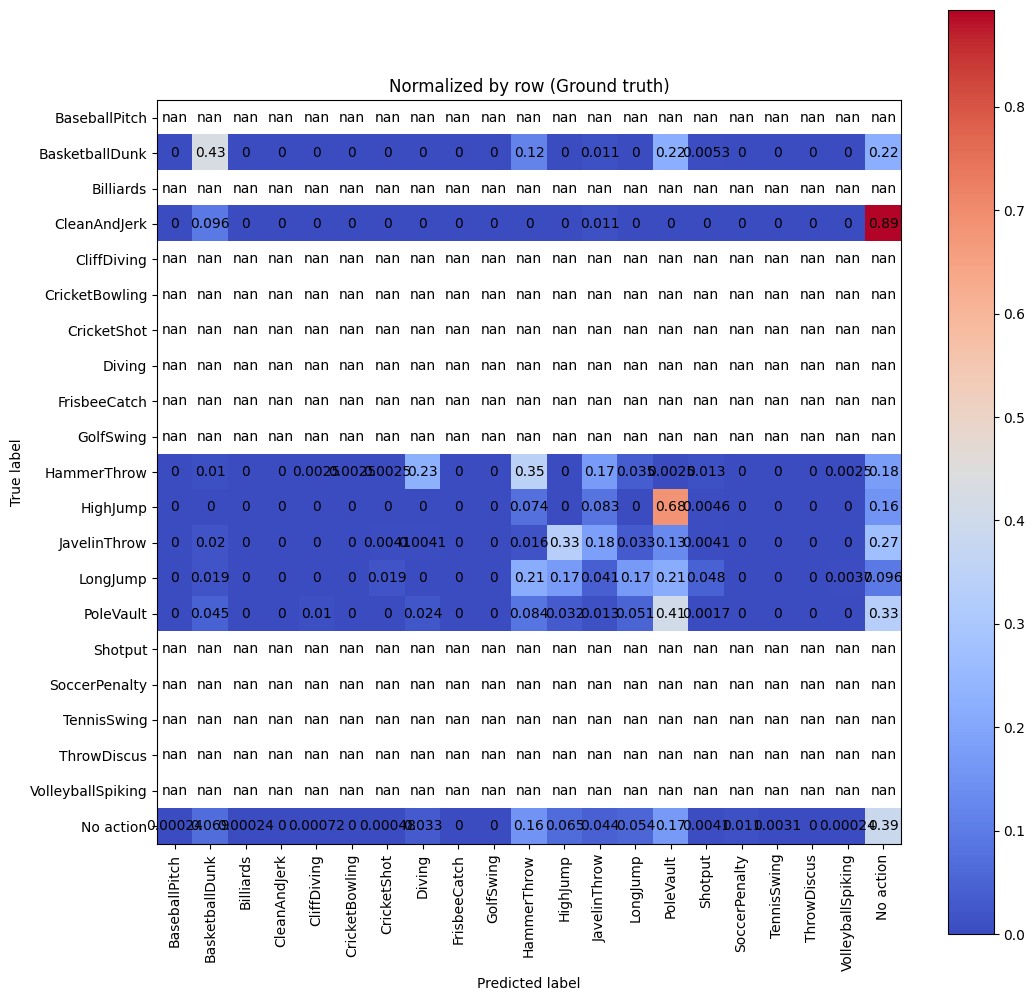

In [3]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm / cm.sum(axis=1, keepdims=True), display_labels=labels)
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
disp.plot(ax=ax, xticks_rotation='vertical', cmap='coolwarm', text_kw={'color': 'black'})
plt.title("Normalized by row (Ground truth)")
plt.show()

In [4]:
precision, recall = np.zeros(len(labels)), np.zeros(len(labels))

for idx, cls_name in enumerate(labels):
    precision[idx] = cm[idx, idx] / cm[:, idx].sum()
    recall[idx] = cm[idx, idx] / cm[idx].sum()
    print(f"{cls_name}: Precision: {precision[idx]:.2f}, Recall: {recall[idx]:.2f}")

print()
print("No Data Cleaning:")
print(f"mean precision: {precision.mean():.2f}, mean recall: {recall.mean():.2f}")
print(f"mean action precision: {precision[:-1].mean():.2f}, mean action recall: {recall[:-1].mean():.2f}")
print()
print("Dropping NaNs:")
print(f"mean precision: {precision[~np.isnan(precision)].mean():.2f}, mean recall: {recall[~np.isnan(recall)].mean():.2f}")
print(f"mean action precision: {precision[:-1][~np.isnan(precision[:-1])].mean():.2f}, mean action recall: {recall[:-1][~np.isnan(recall[:-1])].mean():.2f}")

BaseballPitch: Precision: 0.00, Recall: nan
BasketballDunk: Precision: 0.19, Recall: 0.43
Billiards: Precision: 0.00, Recall: nan
CleanAndJerk: Precision: nan, Recall: 0.00
CliffDiving: Precision: 0.00, Recall: nan
CricketBowling: Precision: 0.00, Recall: nan
CricketShot: Precision: 0.00, Recall: nan
Diving: Precision: 0.00, Recall: nan
FrisbeeCatch: Precision: nan, Recall: nan
GolfSwing: Precision: nan, Recall: nan
HammerThrow: Precision: 0.15, Recall: 0.35
HighJump: Precision: 0.00, Recall: 0.00
JavelinThrow: Precision: 0.13, Recall: 0.18
LongJump: Precision: 0.14, Recall: 0.17
PoleVault: Precision: 0.20, Recall: 0.41
Shotput: Precision: 0.00, Recall: nan
SoccerPenalty: Precision: 0.00, Recall: nan
TennisSwing: Precision: 0.00, Recall: nan
ThrowDiscus: Precision: nan, Recall: nan
VolleyballSpiking: Precision: 0.00, Recall: nan
No action: Precision: 0.76, Recall: 0.39

No Data Cleaning:
mean precision: nan, mean recall: nan
mean action precision: nan, mean action recall: nan

Dropping

/tmp/ipykernel_18970/3594798372.py:5: RuntimeWarning: invalid value encountered in scalar divide
  recall[idx] = cm[idx, idx] / cm[idx].sum()
/tmp/ipykernel_18970/3594798372.py:4: RuntimeWarning: invalid value encountered in scalar divide
  precision[idx] = cm[idx, idx] / cm[:, idx].sum()


In [77]:
cm.sum()

np.float32(17004.0)